In [ ]:
!pip install pypdf2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pickle
import PyPDF2

In [ ]:
!pip install scikit-learn==1.3.2

In [ ]:
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("/content/UpdatedResumeDataSet.csv")

In [ ]:
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt)
    cleanText = re.sub('RT|cc', ' ', cleanText)
    cleanText = re.sub('#\S+\s', ' ', cleanText)
    cleanText = re.sub('@\S+', '  ', cleanText)
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText)
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)
    cleanText = re.sub('\s+', ' ', cleanText)
    return cleanText

In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [ ]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))


In [ ]:
df.head()

,Category,Resume
0,Data Science,Skills Programming Languages Python pandas num...
1,Data Science,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,Areas of Interest Deep Learning Control System...
3,Data Science,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,Education Details MCA YMCAUST Faridabad Haryan...


In [ ]:
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])


In [ ]:
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredText = tfidf.transform(df['Resume'])
le = LabelEncoder()
le.fit(df['Category'])
df['Category_encoded'] = le.transform(df['Category'])
combined_df = pd.DataFrame({
    'Vectorized_Resume': requiredText,
    'Category_encoded': df['Category_encoded']
})
print(combined_df.head())


                                   Vectorized_Resume  Category_encoded
0    (0, 7337)\t0.07793683691598892\n  (0, 7325)\...                 6
1    (0, 7325)\t0.20642184894390578\n  (0, 7272)\...                 6
2    (0, 7325)\t0.24885214475584758\n  (0, 7302)\...                 6
3    (0, 7325)\t0.05902863934210892\n  (0, 7268)\...                 6
4    (0, 7334)\t0.272651642219511\n  (0, 7325)\t0...                 6


In [ ]:
dense_array = requiredText.toarray()
vectorized_data_first_five_rows = dense_array[:5]
print(vectorized_data_first_five_rows)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
missing_values = combined_df.isnull().sum()
print(missing_values)


Vectorized_Resume    0
Category_encoded     0
dtype: int64


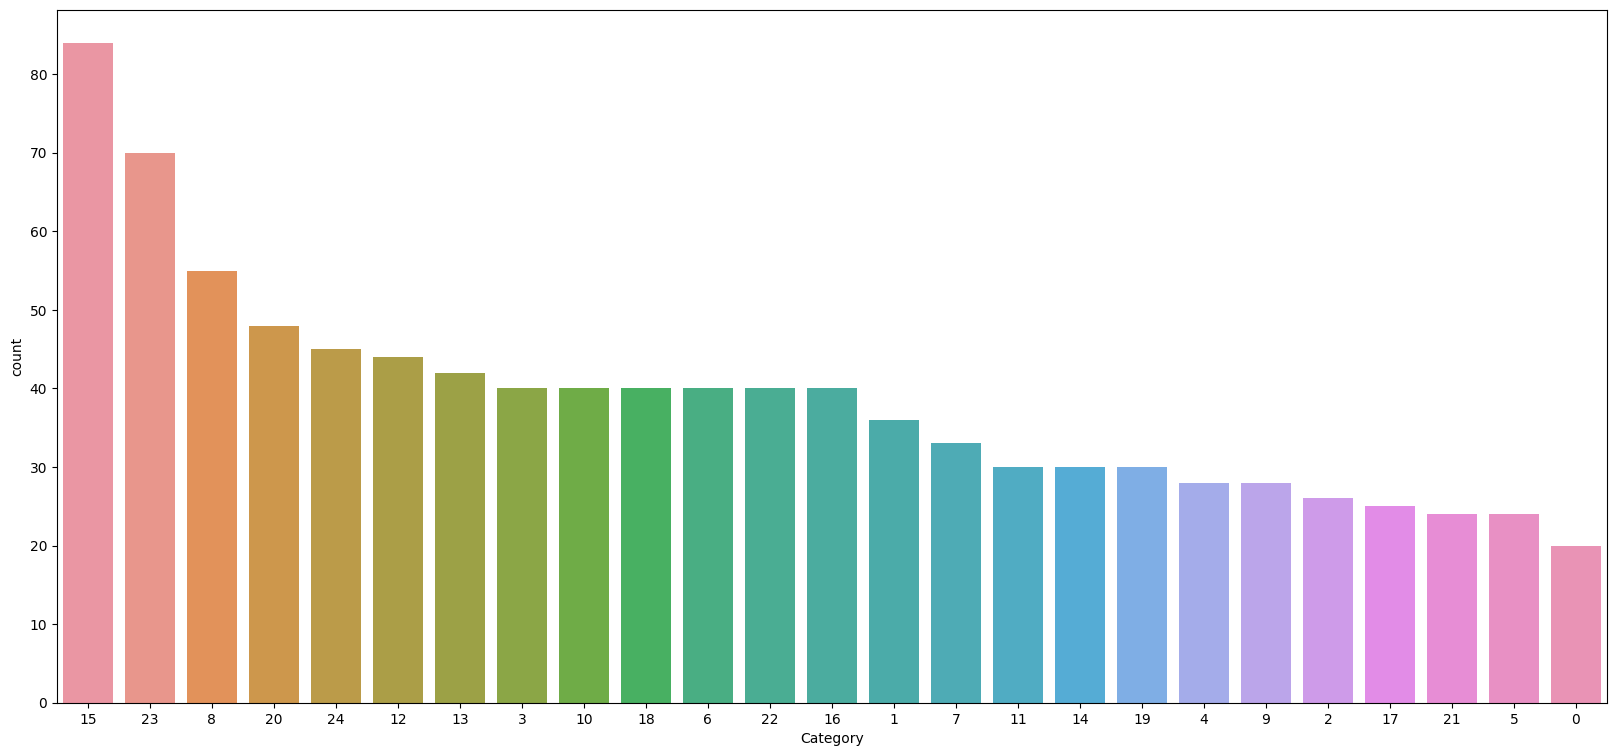

In [ ]:
plt.figure(figsize=(20,9))
sns.countplot(x ='Category', data= df, order= df['Category'].value_counts().index)
plt.show()

In [ ]:
  X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2, random_state=0)


In [ ]:
clf = OneVsRestClassifier(SVC(kernel='linear', C=1.0, probability=True, random_state=0))

In [ ]:
clf.fit(X_train, y_train)


OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True,
                                  random_state=0))

In [ ]:
# Save the trained classifier and TfidfVectorizer to files
with open('svm_classifier.pkl', 'wb') as clf_file:
    pickle.dump(clf, clf_file)

with open('tfidf_vectorizer.pkl', 'wb') as tfidf_file:
    pickle.dump(tfidf, tfidf_file)

print("Trained SVM classifier and TfidfVectorizer saved to files.")

# Load the trained classifier and TfidfVectorizer
clf = pickle.load(open('svm_classifier.pkl', 'rb'))
tfidf = pickle.load(open('tfidf_vectorizer.pkl', 'rb'))

Trained SVM classifier and TfidfVectorizer saved to files.


In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming you have already loaded your model and prepared the test data
# X_test should contain the test samples, and y_test should contain their corresponding labels

# Make predictions using your trained model
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Define the category names for the classification report
category_names = [
    "Advocate",
    "Arts",
    "Automation Testing",
    "Blockchain",
    "Business Analyst",
    "Civil Engineer",
    "Data Science",
    "Database",
    "DevOps Engineer",
    "DotNet Developer",
    "Electrical Engineering",
    "ETL Developer",
    "Hadoop",
    "Health and fitness",
    "HR",
    "Java Developer",
    "Mechanical Engineer",
    "Network Security Engineer",
    "Operations Manager",
    "PMO",
    "Python Developer",
    "SAP Developer",
    "Sales",
    "Testing",
    "Web Designing"
]

# Generate a classification report
class_report = classification_report(y_test, y_pred, target_names=category_names)
print("Classification Report:")
print(class_report)


Accuracy: 0.9948186528497409
Classification Report:
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         3
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         9
         Business Analyst       1.00      1.00      1.00         6
           Civil Engineer       1.00      1.00      1.00         5
             Data Science       1.00      1.00      1.00         9
                 Database       1.00      1.00      1.00         7
          DevOps Engineer       1.00      0.91      0.95        11
         DotNet Developer       1.00      1.00      1.00         9
   Electrical Engineering       1.00      1.00      1.00         8
            ETL Developer       1.00      1.00      1.00         9
                   Hadoop       1.00      1.00      1.00         5
       He

In [ ]:
pdf_resume_path = "E:\MCA\Cyril.pdf"


In [ ]:
def extract_text_from_pdf(pdf_path):
    pdf_text = ""
    try:
        with open(pdf_path, 'rb') as pdf_file:
            pdf_reader = PyPDF2.PdfFileReader(pdf_file)
            for page_num in range(pdf_reader.numPages):
                page = pdf_reader.getPage(page_num)
                pdf_text += page.extractText()
    except Exception as e:
        return str(e)
    return pdf_text

In [ ]:
pdf_resume_text = extract_text_from_pdf(pdf_resume_path)

In [ ]:
cleaned_resume = cleanResume(pdf_resume_text)

In [ ]:
input_features = tfidf.transform([cleaned_resume])


In [ ]:
prediction_id = clf.predict(input_features)[0]

In [ ]:
category_mapping= {
    # Define your category mapping here
    15: "Java Developer",
    23: "Testing",
    8: "DevOps Engineer",
    20: "Python Developer",
    24: "Web Designing",
    12: "HR",
    13: "Hadoop",
    3: "Blockchain",
    10: "ETL Developer",
    18: "Operations Manager",
    6: "Data Science",
    22: "Sales",
    16: "Mechanical Engineer",
    1: "Arts",
    7: "Database",
    11: "Electrical Engineering",
    14: "Health and fitness",
    19: "PMO",
    4: "Business Analyst",
    9: "DotNet Developer",
    2: "Automation Testing",
    17: "Network Security Engineer",
    21: "SAP Developer",
    5: "Civil Engineer",
    0: "Advocate",
}


In [ ]:
category_name = category_mapping.get(prediction_id, "Unknown")

In [ ]:
print("Predicted Category:", category_name)

Predicted Category: Arts
